In [2]:
# Importación de las librerías necesarias
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

In [3]:
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


A continuación, repite los pasos de preprocesamiento que implementaste en el laboratorio "Desde la Comprensión hasta la Preparación" para preparar los datos para el modelado. Para obtener más detalles sobre la preparación de los datos, consulta el laboratorio "Desde la Comprensión hasta la Preparación"."

In [4]:
# Arreglar los nombres mostrados en cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# Convertir todos los nombres en cuisine a minúsculas
recipes["cuisine"] = recipes["cuisine"].str.lower()

# Hacer que los nombres en cuisine sean constantes
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# Remover información de cuisine con menos de 50 recetas:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# Convertir todos los "Yes" a 1 y todos los "No"a 0
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

# Data Modeling <a id="2"></a>

![Image of Allrecipes website](https://cf-courses-data.s3.us-cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig3_allrecipes.png)


In [5]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

%pip install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

Note: you may need to restart the kernel to use updated packages.



Usage:   
  e:\Curso-ibm\venv\Scripts\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  e:\Curso-ibm\venv\Scripts\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  e:\Curso-ibm\venv\Scripts\python.exe -m pip install [options] [-e] <vcs project url> ...
  e:\Curso-ibm\venv\Scripts\python.exe -m pip install [options] [-e] <local project path> ...
  e:\Curso-ibm\venv\Scripts\python.exe -m pip install [options] <archive url/path> ...

no such option: --yes


In [6]:
# Revisa la información nuevamente
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

## [bamboo_tree] Solo Asian and Indian Cuisines

A continuación, repite los pasos de preprocesamiento que implementaste en el laboratorio "Desde la Comprensión hasta la Preparación" para preparar los datos para el modelado. Para obtener más detalles sobre la preparación de los datos, consulta el laboratorio "Desde la Comprensión hasta la Preparación".

In [7]:
# Eligiendo el subset de cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


Vamos a gráficar el decisión tree y examinar como se ve el decisión tree.

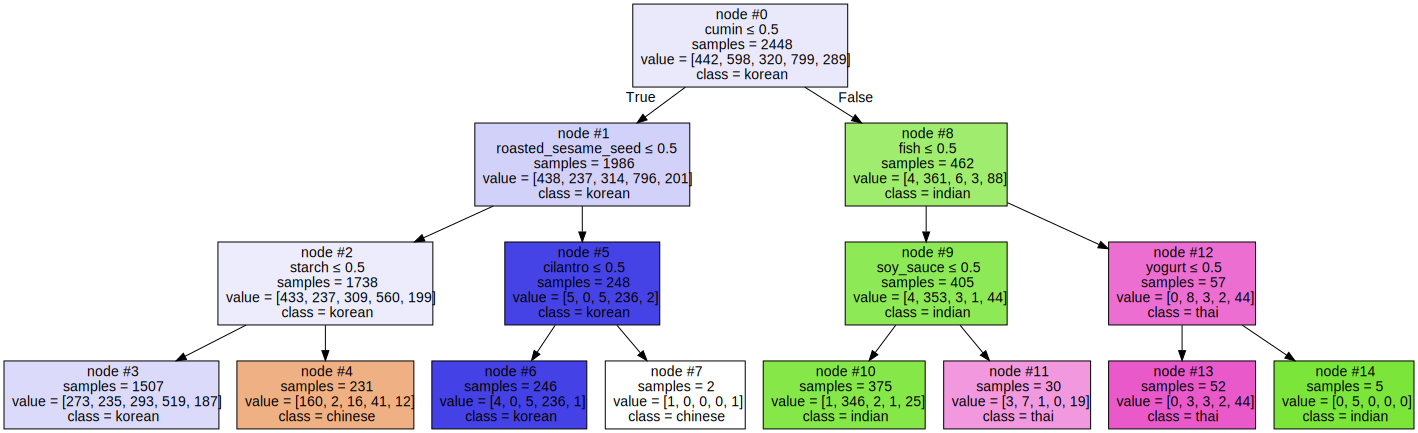

In [8]:
export_graphviz(bamboo_tree,
                feature_names=list(ingredients.columns.values),
                out_file="bamboo_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

El árbol de decisiones aprendió:

* Si una receta contiene cumin, fish y no yoghurt, entonces es muy probable que sea una receta Thai.
* Si una receta contiene cumin pero no pescado y no contiene soy_sauce, entonces es muy probable que sea una receta Indian.

Puedes analizar el remanente de las ramas de el árbol, para llegar a reglas similares

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/flowchart_evaluation.png" width="500">

Siguiente, para evaluar nuestro modelo de Asian y Indian cuisines, debemos dividir el data set en training set y test set. Construiras el decision tree usando el training set. Entonces, probaras el modelo en el set test y comparas el cuisine actual.

Primero creamos un nuevo dataframe usando solo la información perteneciente a Asian y Indian cuisine. y llamaremos al nuevo dataframe bamboo.

In [9]:
bamboo = recipes[recipes.cuisine.isin(["korean","japanese","chinese","thai","indian"])]

Ahora vemos cuantas recetas existen por cada cuisine.

In [11]:
bamboo["cuisine"].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

Removamos 30 recetas de cada cuisine para usarlas como test set, y nombremos este test set como bamboo_test.

In [12]:
sample_n= 30

Siguiente, crea un dataframe conteniendo 30 recetas de cada cuisine, seleccionada de forma aleatoria.

In [13]:
random.seed(1234) #set random seed
bamboo_test = bamboo.groupby("cuisine",group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredientes
bamboo_test_cuisines = bamboo_test["cuisine"]

Ahora creamos el training set removiendo el test set de bamboo data set, y nombrar el training set bamboo_train.

In [16]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:] # Ingredientes
bamboo_train_cuisines = bamboo_train["cuisine"]

Verifica que hay menos de 30 recetas por cada cuisine.

In [17]:
bamboo_train["cuisine"].value_counts()

cuisine
korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: count, dtype: int64

Vamos a construir el decision tree usando el training set bamboo_train, y nombra al árbol generado bamboo_train_tree para la predicción.

In [18]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


Vamos a gráficar el decision tree y explorarlo.

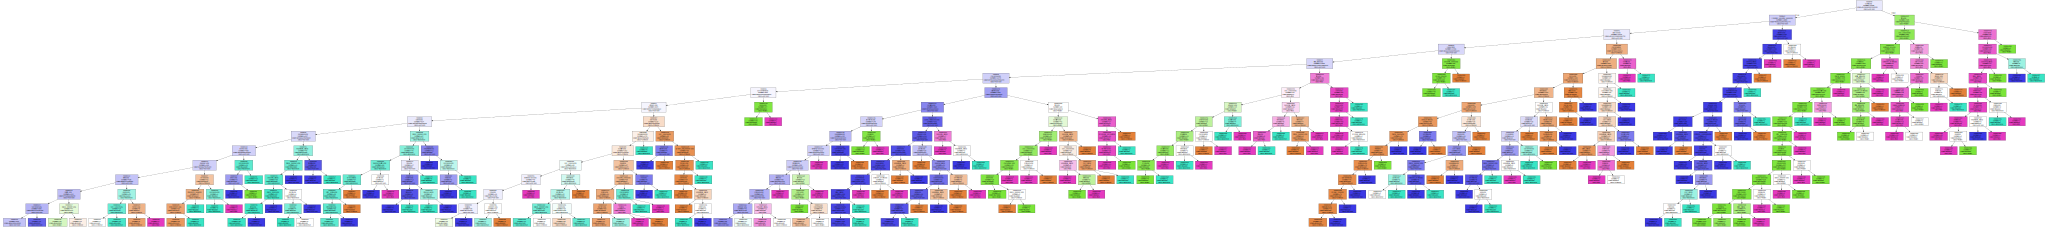

In [20]:
export_graphviz(bamboo_train_tree,
                feature_names=list(bamboo_train_ingredients.columns.values),
                out_file="bamboo_train_tree.dot",
                class_names=np.unique(bamboo_train_cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()
graphviz.Source(bamboo_train_tree_graph)

Ahora que tu defines que nuestro árbol sea mas profundo, mas nodos de decisiones han sido generados.


#### Ahora vamos a probar nuestro modelo sobre el test data.

In [21]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

Para cuantificar cuan bien el árbol de decisiones es capaz de determinar la cuisine de cada receta correctamente. Crearemos una matrix de confusión la cual presenta un lindo sumario de cuantas recetas por cada cuisine esta correctamente clasificada. También arroja algo de luz sobre qué cocinas se están confundiendo con otras cocinas.

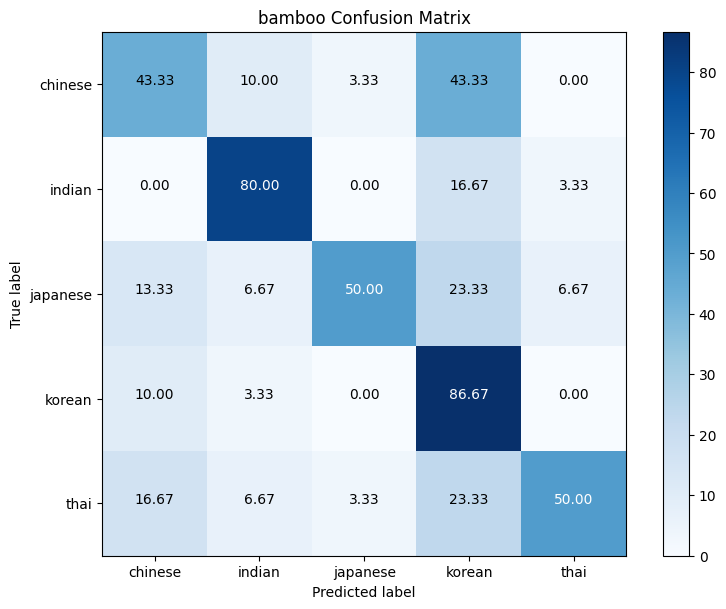

In [22]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix= confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = "bamboo Confusion Matrix"
cmap = plt.cm.Blues

plt.figure(figsize=(8,6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
) * 100

plt.imshow(bamboo_confusion_matrix, interpolation="nearest", cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks,test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i,j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i,j],fmt),
             horizontalalignment ="center",
             color = "white" if bamboo_confusion_matrix[i, j] > thresh else "black")
    
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")

plt.show()

Despues de correr el código de arriba, deberías tener una matrix de confusión similar a la siguiente:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/lab4_fig6_confusion_matrix.png" width="500">

Las filas representa la actual cuisines de el dataset y las columnas representan las predicciones, cada fila debe sumar un 100%. De acuerdo con esta matrix de confusión, hacemos las siguientes observaciones:

* Usando la primera fila en la matrix de confusión, 43% de las recetas **Chinese** en **bamboo_test fueron** correctamente clasificadas por nuestro árbol de decisiones donde el 43% de nuestras recetas fueron mal clasifica, clasificándolas como **Korean**, 10% como **Indian** y 3,3% como **Japoneses**.

* Usando la fila **Indian**, 80% de las recetas en **bamboo_test** fueron correctamente clasificadas, mientras que 16,67% fueron mal clasificadas como **korean** y 3,3% fueron clasificadas como **Thai**.

**Por favor nota** que por que el decision tree fue creado usando muestras al azar de los data points en el training set, puedes no obtener los mismos resultados cada vez que crees un decision tree incluso usando el training set. La performance debe ser todavía comparable, así que no te preocupes si tienes algo ligeramente diferente en tu matrix de confusión con respecto a la mostrada arriba.

Usando de referencia la matrix de confusión, cuantas recetas **Japanese** están correctamente clasificadas por nuestro árbol de decisiones?

Respuesta: 36.67% de las recetas **japanese** en **bamboo_test** fueron correctamente clasificadas

También de referencia la matrix de confusión, cuantas recetas **Korean** fueron mal clasificadas como **Japanese**.

Respuesta: 3.33% de nuestras recetas **Korean** fueron clasificadas como **Japanese**

Que cuisine tiene el menor numero de recetas correctamente clasificadas por el árbol de decisiones, usando de referencia la matrix de confusión


Respuesta: La cuisine **japanese** con un 36.67% fue la que menor % de acierto tuvo en la clasificación según la matrix de confusión